In [35]:
### Bibliotheken
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [ ]:
#Daten einlesen

PreRe1 = pd.read_csv("C_Daten_Schröter_Till/2025-04-11-10-56_Pre_C_Re_1.csv",delimiter=';',encoding='utf-8',decimal=',', skiprows=3)
PreRe2 = pd.read_csv("C_Daten_Schröter_Till/2025-04-11-11-05_Pre_C_Re_2.csv",delimiter=';',encoding='utf-8',decimal=',', skiprows=3)
PreRe3 = pd.read_csv("C_Daten_Schröter_Till/2025-04-11-11-05_Pre_C_Re_3.csv",delimiter=';',encoding='utf-8',decimal=',', skiprows=3)

time1 = PreRe1["time"]  # Zeit in Sekunden
time1 = time1 - time1[0]  #Offset entfernen, damit die Zeit bei 0 beginnt
print(time1)
#Dimension von time1 
print("Dimension von time1: ", time1.shape)

time2 = PreRe2["time"]  
time2 = time2 - time2[0]  

time3 = PreRe3["time"]  
time3 = time3 - time3[0]    


C:\Users\elisa\AppData\Local\Temp\ipykernel_29732\410918903.py:3: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  PreRe1 = pd.read_csv("C_Daten_Schröter_Till/2025-04-11-10-56_Pre_C_Re_1.csv",delimiter=';',encoding='utf-8',decimal=',', skiprows=3)
C:\Users\elisa\AppData\Local\Temp\ipykernel_29732\410918903.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  PreRe2 = pd.read_csv("C_Daten_Schröter_Till/2025-04-11-11-05_Pre_C_Re_2.csv",delimiter=';',encoding='utf-8',decimal=',', skiprows=3)


0       0.000
1       0.001
2       0.002
3       0.003
4       0.004
        ...  
7292    7.292
7293    7.293
7294    7.294
7295    7.295
7296    7.296
Name: time, Length: 7297, dtype: float64
Dimension von time1:  (7297,)


C:\Users\elisa\AppData\Local\Temp\ipykernel_29732\410918903.py:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  PreRe3 = pd.read_csv("C_Daten_Schröter_Till/2025-04-11-11-05_Pre_C_Re_3.csv",delimiter=';',encoding='utf-8',decimal=',', skiprows=3)


Peaks in GRFz1:  [3418]
Zeitpunkt Peak1:  3418    3.418
Name: time, dtype: float64
Peaks in GRFz2:  [3223]
Zeitpunkt Peak2:  3223    3.223
Name: time, dtype: float64
Peaks in GRFz3:  [2963]
Zeitpunkt Peak3:  2963    2.963
Name: time, dtype: float64


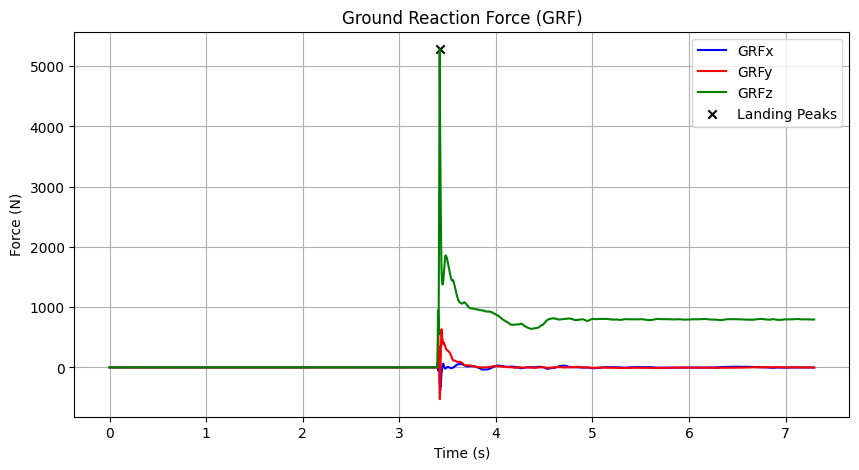

In [56]:
#Ground Reaction Force (GRF) in N

GRFx1= PreRe1["Force plate group-Ground reaction force-x (N)"]
GRFy1= PreRe1["Force plate group-Ground reaction force-y (N)"]
GRFz1= PreRe1["Force plate group-Ground reaction force-z (N)"]

GRFx2= PreRe2["Force plate group-Ground reaction force-x (N)"]
GRFy2= PreRe2["Force plate group-Ground reaction force-y (N)"]
GRFz2= PreRe2["Force plate group-Ground reaction force-z (N)"]

GRFx3= PreRe3["Force plate group-Ground reaction force-x (N)"]
GRFy3= PreRe3["Force plate group-Ground reaction force-y (N)"]
GRFz3= PreRe3["Force plate group-Ground reaction force-z (N)"]


#detect landing peaks in GRFz1, GRFz2, GRFz3
peaks1, _ = find_peaks(GRFz1, height=5000)  # Find peaks in GRFz1
peaks2, _ = find_peaks(GRFz2, height=5000)  # Find peaks in GRFz2
peaks3, _ = find_peaks(GRFz3, height=5000)  # Find peaks in GRFz3
print("Peaks in GRFz1: ", peaks1)
print("Zeitpunkt Peak1: ",time1[peaks1])
print("Peaks in GRFz2: ", peaks2)
print("Zeitpunkt Peak2: ",time2[peaks2])
print("Peaks in GRFz3: ", peaks3)
print("Zeitpunkt Peak3: ",time3[peaks3])




plt.figure(figsize=(10, 5))
plt.plot(time1, GRFx1, label='GRFx', color='blue')
plt.plot(time1, GRFy1, label='GRFy', color='red')
plt.plot(time1, GRFz1, label='GRFz', color='green')
plt.title('Ground Reaction Force (GRF)')
plt.xlabel('Time (s)')
plt.ylabel('Force (N)')
#mark landing peak with an x 
plt.scatter(time1[peaks1], GRFz1[peaks1], color='black', label='Landing Peaks', marker='x')
plt.legend()
plt.grid()
plt.show()




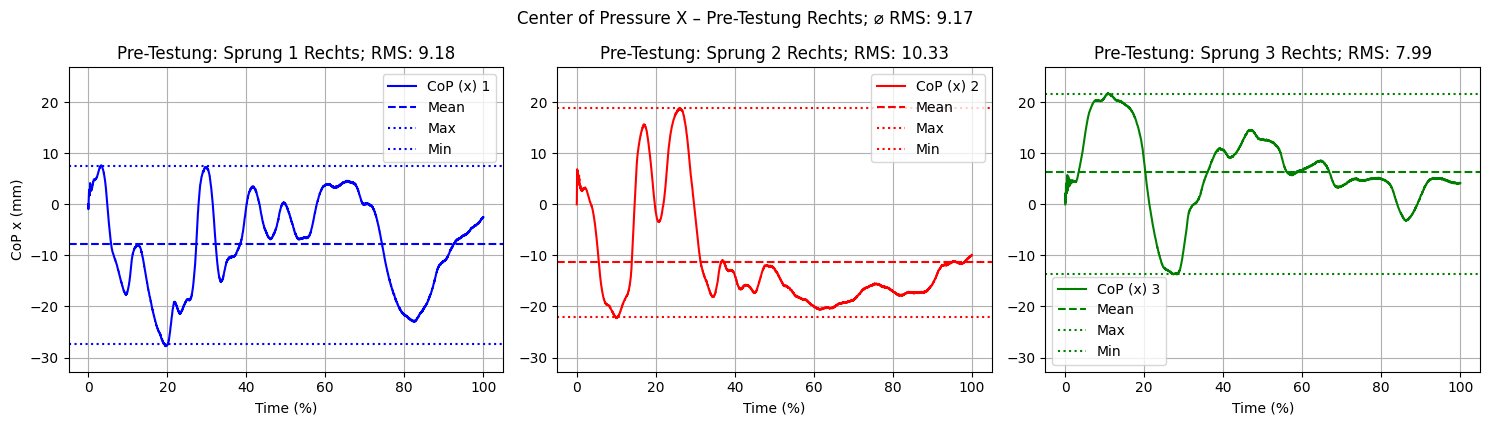

9.17825997083756 10.326140819701491 7.9933450728969255


In [78]:
#Center of Pressure (CoP) in mm

CoPx1 = PreRe1["Force plate group-Center of pressure-x (mm)"]
CoPy1 = PreRe1["Force plate group-Center of pressure-y (mm)"]

CoPx2 = PreRe2["Force plate group-Center of pressure-x (mm)"]
CoPy2 = PreRe2["Force plate group-Center of pressure-y (mm)"]

CoPx3 = PreRe3["Force plate group-Center of pressure-x (mm)"]
CoPy3 = PreRe3["Force plate group-Center of pressure-y (mm)"]

# Normalisieren der CoP-Daten ab dem Landepeak auf 100%
CoPx1_norm = CoPx1[peaks1[0]:] - CoPx1[peaks1[0]]
CoPy1_norm = CoPy1[peaks1[0]:] - CoPy1[peaks1[0]]
CoPx2_norm = CoPx2[peaks2[0]:] - CoPx2[peaks2[0]]
CoPy2_norm = CoPy2[peaks2[0]:] - CoPy2[peaks2[0]]
CoPx3_norm = CoPx3[peaks3[0]:] - CoPx3[peaks3[0]]
CoPy3_norm = CoPy3[peaks3[0]:] - CoPy3[peaks3[0]]
# Normalisieren der Zeit ab dem Landepeak auf 100%
time1_norm = time1[peaks1[0]:] - time1[peaks1[0]]
time2_norm = time2[peaks2[0]:] - time2[peaks2[0]]
time3_norm = time3[peaks3[0]:] - time3[peaks3[0]]
# Normalisieren der Zeit auf 100%
time1_norm = time1_norm / time1_norm.max() * 100
time2_norm = time2_norm / time2_norm.max() * 100
time3_norm = time3_norm / time3_norm.max() * 100

from scipy.interpolate import interp1d
import numpy as np

def resample_to_100(time, signal):
    f = interp1d(time, signal, kind='linear')
    time_uniform = np.linspace(0, 100, 100)
    signal_uniform = f(time_uniform)
    return signal_uniform

copx1_100 = resample_to_100(time1_norm, CoPx1_norm)
copx2_100 = resample_to_100(time2_norm, CoPx2_norm)
copx3_100 = resample_to_100(time3_norm, CoPx3_norm)

#Durchschnitt jeweils über die drei Proben bilden
copx1_mean = np.mean(copx1_100)
copx1_max = np.max(copx1_100)
copx1_min = np.min(copx1_100)
copx1_rms = np.sqrt(np.mean((copx1_100 - copx1_mean) ** 2))
copx2_mean = np.mean(copx2_100)
copx2_max = np.max(copx2_100)
copx2_min = np.min(copx2_100)
copx2_rms = np.sqrt(np.mean((copx2_100 - copx2_mean) ** 2))
copx3_mean = np.mean(copx3_100)
copx3_max = np.max(copx3_100)
copx3_min = np.min(copx3_100)
copx3_rms = np.sqrt(np.mean((copx3_100 - copx3_mean) ** 2))
mean_rms = np.mean([copx1_rms, copx2_rms, copx3_rms])

# Gemeinsames Y-Limit für alle Plots berechnen
ymin = min(CoPx1_norm.min(), CoPx2_norm.min(), CoPx3_norm.min())
ymax = max(CoPx1_norm.max(), CoPx2_norm.max(), CoPx3_norm.max())

# Optional: etwas Rand hinzufügen
padding = 5  # z. B. 5 mm
ymin -= padding
ymax += padding

plt.figure(figsize=(15, 4))

# --- Subplot 1: CoPx1 ---
plt.subplot(1, 3, 1)
plt.plot(time1_norm, CoPx1_norm, color='blue', label='CoP (x) 1')
plt.axhline(y=copx1_mean, color='blue', linestyle='--', label='Mean')
plt.axhline(y=copx1_max, color='blue', linestyle=':', label='Max')
plt.axhline(y=copx1_min, color='blue', linestyle=':', label='Min')
plt.title('Pre-Testung: Sprung 1 Rechts; RMS: {:.2f}'.format(copx1_rms))
plt.xlabel('Time (%)')
plt.ylabel('CoP x (mm)')
plt.ylim(ymin, ymax)
plt.grid()
plt.legend()

# --- Subplot 2: CoPx2 ---
plt.subplot(1, 3, 2)
plt.plot(time2_norm, CoPx2_norm, color='red', label='CoP (x) 2')
plt.axhline(y=copx2_mean, color='red', linestyle='--', label='Mean')
plt.axhline(y=copx2_max, color='red', linestyle=':', label='Max')
plt.axhline(y=copx2_min, color='red', linestyle=':', label='Min')
plt.title('Pre-Testung: Sprung 2 Rechts; RMS: {:.2f}'.format(copx2_rms))
plt.xlabel('Time (%)')
plt.ylim(ymin, ymax)
plt.grid()
plt.legend()

# --- Subplot 3: CoPx3 ---
plt.subplot(1, 3, 3)
plt.plot(time3_norm, CoPx3_norm, color='green', label='CoP (x) 3')
plt.axhline(y=copx3_mean, color='green', linestyle='--', label='Mean')
plt.axhline(y=copx3_max, color='green', linestyle=':', label='Max')
plt.axhline(y=copx3_min, color='green', linestyle=':', label='Min')
plt.title('Pre-Testung: Sprung 3 Rechts; RMS: {:.2f}'.format(copx3_rms))
plt.xlabel('Time (%)')
plt.ylim(ymin, ymax)
plt.grid()
plt.legend()

plt.tight_layout()
plt.suptitle('Center of Pressure X – Pre-Testung Rechts; ⌀ RMS: {:.2f}'.format(mean_rms), y=1.05)
plt.show()

print(copx1_rms, copx2_rms, copx3_rms)
